<a href="https://colab.research.google.com/github/AndrewFatula/Simple-CNNs/blob/master/lab3_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib.pyplot as plt
from collections import deque

# tensorflow imports
import tensorflow as tf

# tf.keras imports
from tensorflow.keras import Model
from keras import regularizers

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)

Using TensorFlow backend.


1.15.0


In [0]:
!pip uninstall auth
!pip uninstall grpcio
!pip uninstall tensorflow
!pip install auth==1.4.2
!pip install grpcio==1.24.3
!pip install tensorflow==2.0.0
print(tf.__version__)

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
downloaded = drive.CreateFile({'id':'1j4CcQIb2eKLWalM4HETc4gJuC0wT4Rpt'}) 
downloaded.GetContentFile('images_data.npz') 
downloaded = drive.CreateFile({'id':'1uu8LD2On1ZkP5Il31XUmn1kuXmmvXi17'})
downloaded.GetContentFile('points.npz') 

dfile = "images_data.npz"
images = np.load(dfile, allow_pickle = True)['arr_0']
dfile2 = "points.npz"
keypoints = np.load(dfile2, allow_pickle = True)['arr_0']


if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)


cluster_resolver = tf.distribute.cluster_resolver.TPUClusterResolver(
    tpu=tpu_address)
tf.config.experimental_connect_to_cluster(cluster_resolver)
tf.tpu.experimental.initialize_tpu_system(cluster_resolver)
tpu_strategy = tf.distribute.experimental.TPUStrategy(cluster_resolver)

BATCH_SIZE_PER_REPLICA = 16
BATCH_SIZE = BATCH_SIZE_PER_REPLICA * tpu_strategy.num_replicas_in_sync

print ('Number of devices: {}'.format(tpu_strategy.num_replicas_in_sync))

TPU address is grpc://10.119.122.2:8470
INFO:tensorflow:Initializing the TPU system: 10.119.122.2:8470


INFO:tensorflow:Initializing the TPU system: 10.119.122.2:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of devices: 8


In [0]:
LEARNING_RATE = 0.005
num_classes = 8
n_filters = 32
n_fc1 = 2048
n_fc2 = 1024
input_shape = ( 523, 523, 3)

n_epochs = 500

#input, n_filters, strides




class bottleneck_block(tf.keras.layers.Layer):
  def __init__(self, input_shape, n_filters):
    super(bottleneck_block, self).__init__()
    self.short = tf.keras.layers.Conv2D(n_filters, kernel_size = (1,1), 
                                        input_shape=input_shape, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    input_shape2 = (input_shape[0], input_shape[1], int(n_filters/4))
    input_shape3 = (input_shape[0], input_shape[1], int(n_filters/2))

    self.conv1 = tf.keras.layers.Conv2D(int(n_filters/4), kernel_size = (1,1),
                                        input_shape=input_shape, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.conv2 = tf.keras.layers.Conv2D(int(n_filters/2), kernel_size = (3,3), 
                                        padding = "same",input_shape=input_shape2, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.out = tf.keras.layers.Conv2D(n_filters, kernel_size = (1,1), 
                                      padding = "same", input_shape=input_shape3, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.layers = [self.short, self.conv1, self.conv2, self.out]

  def call(self, input):
     shortcut = self.short(input)
     input2 = self.conv1(input)
     input3 = self.conv2(input2)
     output = self.out(input3)
     return tf.keras.layers.Add()([shortcut, output]) 

  def get_layers(self):
    return self.layers  


class bottleneck_block_without_shortcut(tf.keras.layers.Layer):
  def __init__(self, input_shape):
    super(bottleneck_block_without_shortcut, self).__init__()
    input_shape2 = (input_shape[0], input_shape[1], int(input_shape[2]/4))
    input_shape3 = (input_shape[0], input_shape[1], int(input_shape[2]/2))

    self.conv1 = tf.keras.layers.Conv2D(int(input_shape[2]/4), kernel_size = (1,1),
                                        input_shape=input_shape, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.conv2 = tf.keras.layers.Conv2D(int(input_shape[2]/2), kernel_size = (3,3), 
                                        padding = "same",input_shape=input_shape2, 
                                        activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.out = tf.keras.layers.Conv2D(input_shape[2], kernel_size = (1,1), padding = "same", 
                                      input_shape=input_shape3, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.layers = [ self.conv1, self.conv2, self.out]

  def call(self, input):
     input2 = self.conv1(input)
     input3 = self.conv2(input2)
     output = self.out(input3)
     return tf.keras.layers.Add()([input, output]) 

  def get_layers(self):
    return self.layers 



class BCNN(tf.keras.Model):

  def __init__(self, input, num_classes, n_filters, n_fc1, n_fc2):
    super(BCNN, self).__init__()
    self.start_conv = tf.keras.layers.Conv2D(int(n_filters/8), kernel_size = (13, 13), strides = (2,2),  
                                        input_shape = input, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    
    input_shape = (int((input[0]-11)/2), int((input[1]-11)/2), int(n_filters/8))
    self.bottleneck1 = bottleneck_block(input_shape, n_filters)
    self.dropout = tf.keras.layers.Dropout(0.3)
    self.pool1 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))


    input_shape1 = (int(input_shape[0]/2), int(input_shape[1]/2), n_filters)
    self.bottleneck2 = bottleneck_block_without_shortcut(input_shape1)
    self.pool2 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))

    input_shape2 = (int(input_shape[0]/4), int(input_shape[1]/4), n_filters)
    self.bottleneck3 = bottleneck_block_without_shortcut(input_shape2)
    self.pool3 = tf.keras.layers.MaxPooling2D(pool_size = (2,2))

    input_shape3 = (int(input_shape[0]/8), int(input_shape[1]/8), n_filters)
    self.bottleneck4 = bottleneck_block(input_shape3, n_filters*8)
    self.pool4 = tf.keras.layers.MaxPooling2D(pool_size = (8,8))



    self.flatten = tf.keras.layers.Flatten()
    self.fc1 = tf.keras.layers.Dense(n_fc1, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.fc2 = tf.keras.layers.Dense(n_fc2, activation="relu", kernel_regularizer=regularizers.l2(0.002))
    self.out = tf.keras.layers.Dense(num_classes, kernel_regularizer=regularizers.l2(0.002))

  def call(self, inputs, train = True):
    if train:
      x = self.start_conv(inputs)
      x1_ = self.bottleneck1(x)
      x1 = self.dropout(x1_)
      x2 = self.pool1(x1)
      x3_ = self.bottleneck2(x2)
      x3 = self.dropout(x3_)
      x4 = self.pool2(x3)
      x5_ = self.bottleneck3(x4)
      x5 = self.dropout(x5_)
      x6 = self.pool2(x5)
      x7_ = self.bottleneck4(x6)
      x7 = self.dropout(x7_)
      x8 = self.pool4(x7)
      x9 = self.flatten(x8)
      x10_ = self.fc1(x9)
      x10 = self.dropout(x10_)
      x11_ = self.fc2(x10)
      x11 = self.dropout(x11_)
      x12 = self.out(x11)
      return tanhshrink(x12)
    else:
      x = self.start_conv(inputs)
      x1 = self.bottleneck1(x)
      x2 = self.pool1(x1)
      x3 = self.bottleneck2(x2)
      x4 = self.pool2(x3)
      x5 = self.bottleneck3(x4)
      x6 = self.pool2(x5)
      x7 = self.bottleneck4(x6)
      x8 = self.pool4(x7)
      x9 = self.flatten(x8)
      x10 = self.fc1(x9)
      x11 = self.fc2(x10)
      x12 = self.out(x11)
      return tanhshrink(x12)

def tanhshrink(x):
  return tf.add(x, -tf.tanh(x))



(501, 523, 523, 3)
(501, 523, 523, 3)


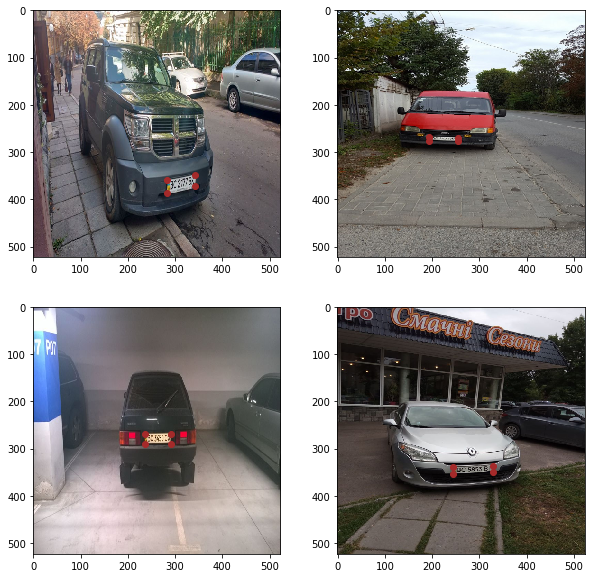

In [0]:
shape = np.shape(images)

image_tensor = images/255
#image_tensor = tf.convert_to_tensor(image_tensor)/255
_images = image_tensor

print(shape)


mean_keypoints = np.mean(keypoints, axis = 0)
mean_keypoints = tf.cast(tf.convert_to_tensor(mean_keypoints), tf.float32)



train_images, test_images, train_keypoints, test_keypoints = train_test_split(_images.tolist(), keypoints.tolist(), test_size = 0.01, shuffle = False)


train_images = tf.cast(tf.convert_to_tensor(train_images), tf.float32)
test_images = tf.cast(tf.convert_to_tensor(test_images), tf.float32)
train_keypoints = tf.cast(tf.convert_to_tensor(train_keypoints), tf.float32)
test_keypoints = tf.cast(tf.convert_to_tensor(test_keypoints), tf.float32)

print(shape)

length_train = np.shape(train_keypoints)[0]

rand_idx = np.random.randint(length_train)

plt.figure(figsize = (10,10))
for i in range(4):

  plt.subplot(2,2,1+i)
  plt.imshow(train_images[i + rand_idx,...])
  points = tf.Variable(keypoints[rand_idx+i, :])

  plt.scatter(x = points[0:4], y = points[4:], c = "brown")

plt.show()
plt.close()

train_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_keypoints)).batch(BATCH_SIZE)
train_dist_dataset = tpu_strategy.experimental_distribute_dataset(train_dataset)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


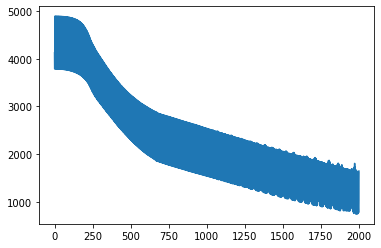

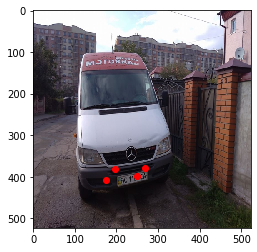

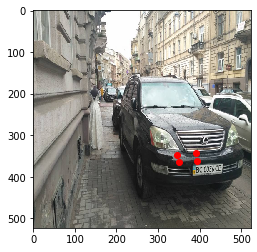

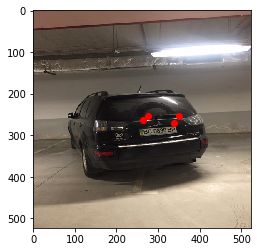

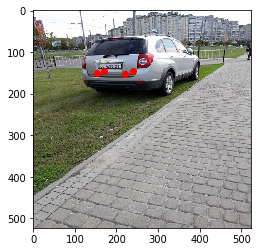

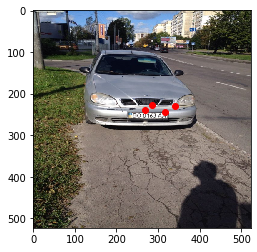

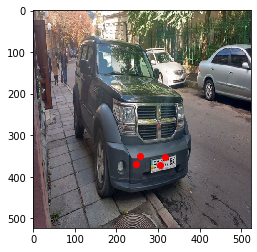

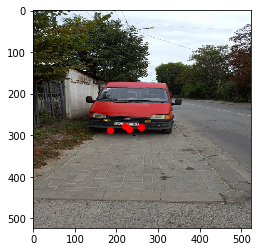

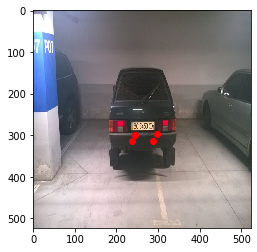

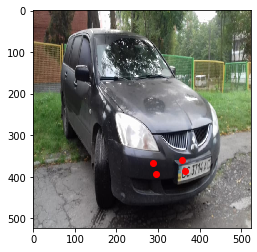

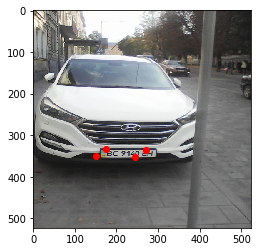

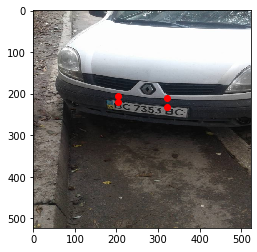

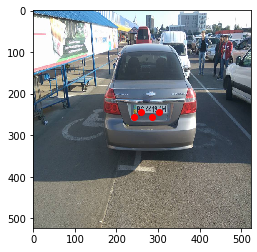

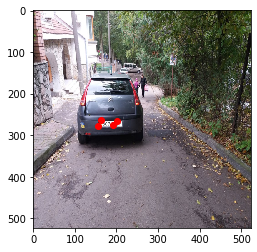

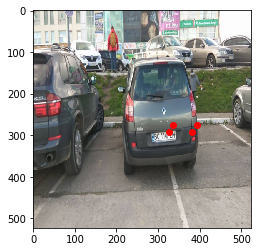

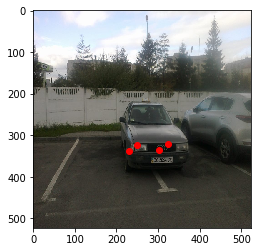

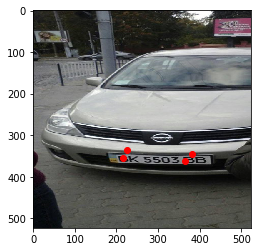

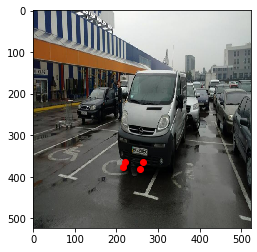

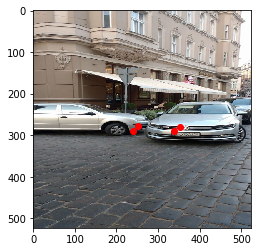

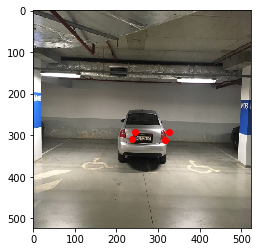

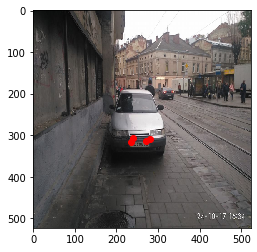

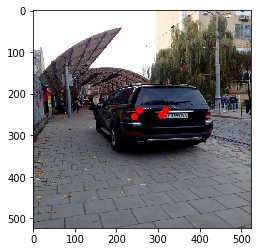

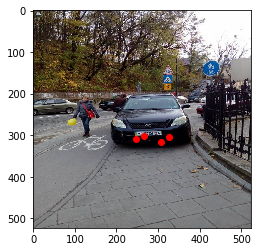

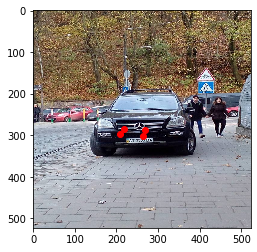

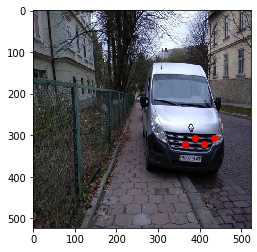

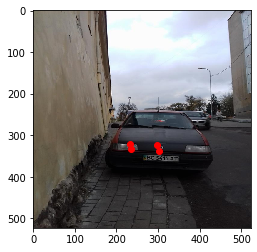

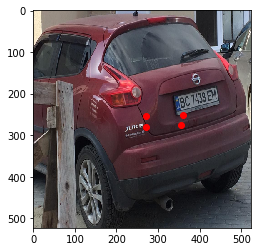

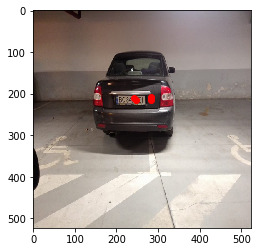

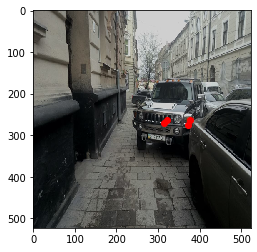

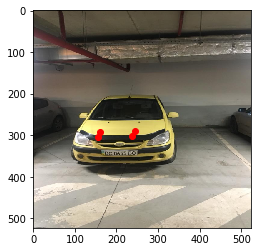

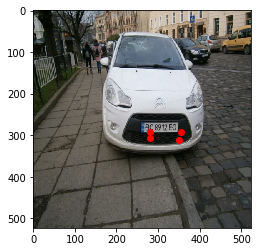

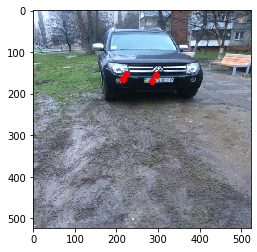

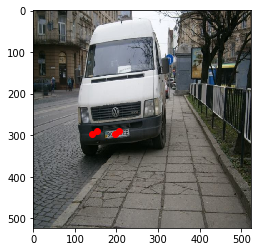

35:45


In [0]:
start = time.localtime(time.time())

losses = deque(maxlen = 50)
losses_plot = []

with tpu_strategy.scope():
  # Set reduction to `none` so we can do the reduction afterwards and divide by
  # global batch size.
  loss_object = tf.keras.losses.MeanSquaredError(
      reduction=tf.keras.losses.Reduction.NONE)
  # or loss_fn = tf.keras.losses.sparse_categorical_crossentropy
  def compute_loss(labels, predictions):
    per_example_loss = loss_object(labels, predictions)
    return tf.nn.compute_average_loss(per_example_loss, global_batch_size=BATCH_SIZE)

  def train_step1(inputs, mean_keypoints):
    images, labels = inputs

    with tf.GradientTape() as tape:
      predictions = model(images, train = True) + mean_keypoints
      loss = compute_loss(labels, predictions)
    
      gradients = tape.gradient(loss, model.trainable_variables)
    optimizer1.apply_gradients(zip(gradients, model.trainable_variables))

    return loss 

  def train_step2(inputs, mean_keypoints):
    images, labels = inputs

    with tf.GradientTape() as tape:
      predictions = model(images, train=True) + mean_keypoints
      loss = compute_loss(labels, predictions)
    
      gradients = tape.gradient(loss, model.trainable_variables)
    optimizer2.apply_gradients(zip(gradients, model.trainable_variables))

    return loss   

  def test_step(inputs, mean_keypoints):
    images, labels = inputs

    predictions = model(images, train = False) + mean_keypoints
    loss = compute_loss(labels, predictions)

    return loss   

  model = BCNN(input_shape, num_classes, n_filters, n_fc1, n_fc2)
  optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.00001)
  optimizer2 = tf.keras.optimizers.Adam(learning_rate=0.00001, beta_1=0.3)

  @tf.function
  def distributed_train_step1(dataset_inputs, mean_keypoints):
    per_replica_losses = tpu_strategy.experimental_run_v2(train_step1,
                                                      args=(dataset_inputs, mean_keypoints, ))
    return tpu_strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses,
                           axis=None)
  @tf.function
  def distributed_train_step2(dataset_inputs, mean_keypoints):
    per_replica_losses = tpu_strategy.experimental_run_v2(train_step2,
                                                      args=(dataset_inputs, mean_keypoints, ))
    return tpu_strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses,
                           axis=None)  
    
  @tf.function
  def distributed_test_step(dataset_inputs, mean_keypoints):
    per_replica_losses = tpu_strategy.experimental_run_v2(test_step,
                                                      args=(dataset_inputs, mean_keypoints, ))
    return tpu_strategy.reduce(tf.distribute.ReduceOp.SUM, per_replica_losses,
                           axis=None)  
 
  step_test =0
  step = 0
  rand_idx = np.random.randint(10)


  test_losses = []

  for epoch in range(n_epochs):
    
    # TRAIN LOOP
    num_batches = 0
    if epoch > 0:
      print(epoch)

    for x in train_dist_dataset:
      step+=1
      if epoch > n_epochs/3: 
        loss = distributed_train_step2(x, mean_keypoints)
      else:  
        loss = distributed_train_step1(x, mean_keypoints)
      num_batches += 1

      test_loss = distributed_test_step(x, mean_keypoints)
      test_losses.append(test_loss)

       

  plt.plot(test_losses)
  plt.show()
  plt.close()

with tf.device("cpu:0"):
  for j in range(8):
    check_image_ = train_images[j*10: j*10 +4]
    output = (model(check_image_, train = False)) + mean_keypoints
    for i in range(4):
      image_ = check_image_[i,...]
      keypoints_ = output[i]

      plt.imshow(image_,)
      plt.scatter(x = keypoints_[0:4], y = keypoints_[4:], c = "red")
      plt.show()




end = time.localtime(time.time())
start_in_sec = start[3]*3600 + start[4]*60 + start[5]
end_in_sec = end[3]*3600 + end[4]*60 + end[5]


all_time_min = int((end_in_sec-start_in_sec)/60)
all_time_sec = (end_in_sec-start_in_sec)%60
if all_time_min < 10:
	if all_time_sec < 10:
		print('0%s:0%s' % (all_time_min, all_time_sec ))
	else:
		print('0%s:%s' % (all_time_min, all_time_sec ))	
else:
	if all_time_sec < 10:
		print('%s:0%s' % (all_time_min, all_time_sec ))
	else:
		print('%s:%s' % (all_time_min, all_time_sec ))